 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [342]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [343]:
# Reading whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_path, parse_dates=True, infer_datetime_format=True, index_col="Date")

In [344]:
# Count nulls
whale_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [345]:
# Drop nulls
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [346]:
# Reading algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_path, parse_dates=True, infer_datetime_format=True, index_col="Date")

In [347]:
# Count nulls
algo_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [348]:
# Drop nulls
algo_df = algo_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [349]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_path, parse_dates=True, infer_datetime_format=True, index_col="Date")
print(sp500_df)

               Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06
...              ...
2012-10-05  $1460.93
2012-10-04  $1461.40
2012-10-03  $1450.99
2012-10-02  $1445.75
2012-10-01  $1444.49

[1649 rows x 1 columns]


In [350]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [351]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
print(sp500_df)
print(sp500_df.dtypes)

              Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06
...             ...
2012-10-05  1460.93
2012-10-04  1461.40
2012-10-03  1450.99
2012-10-02  1445.75
2012-10-01  1444.49

[1649 rows x 1 columns]
Close    float64
dtype: object


/var/folders/vt/2byyqk1926d1jr8pgmmq91l40000gn/T/ipykernel_656/2754356069.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


In [352]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change().dropna()
sp500_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [353]:
# Drop nulls
sp500_df = sp500_df.dropna()

In [354]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns={"Close":"S&P500"}, inplace=True)
sp500_df.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [355]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_df,algo_df,sp500_df], axis='columns', join ='inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Plot of All portfolio'}, xlabel='Date'>

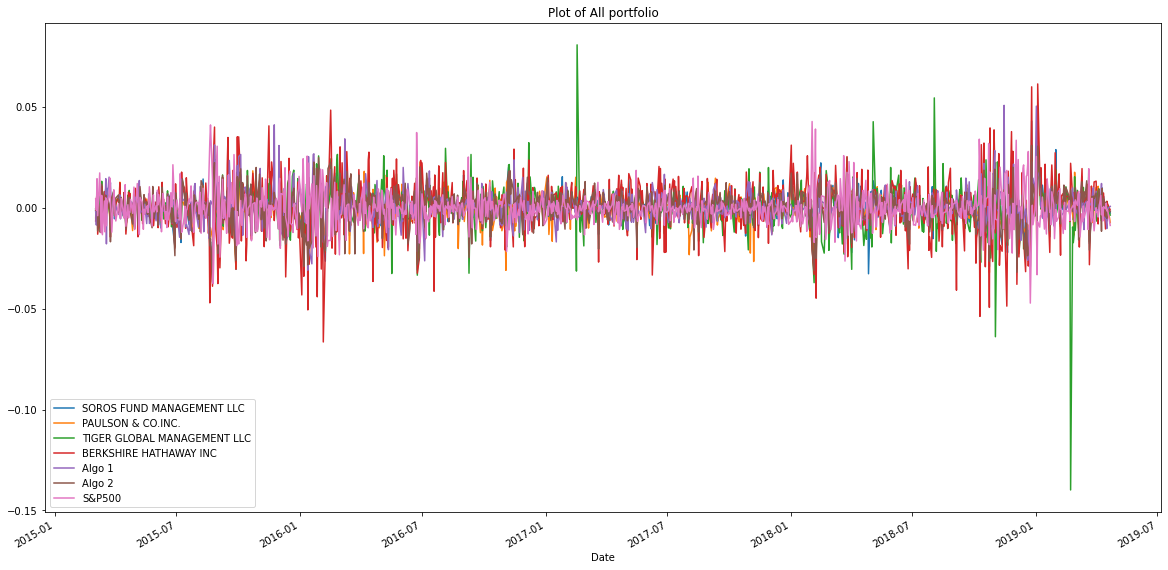

In [356]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(20,10), title='Plot of All portfolio')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Calculate cumulative of All portfolio'}, xlabel='Date'>

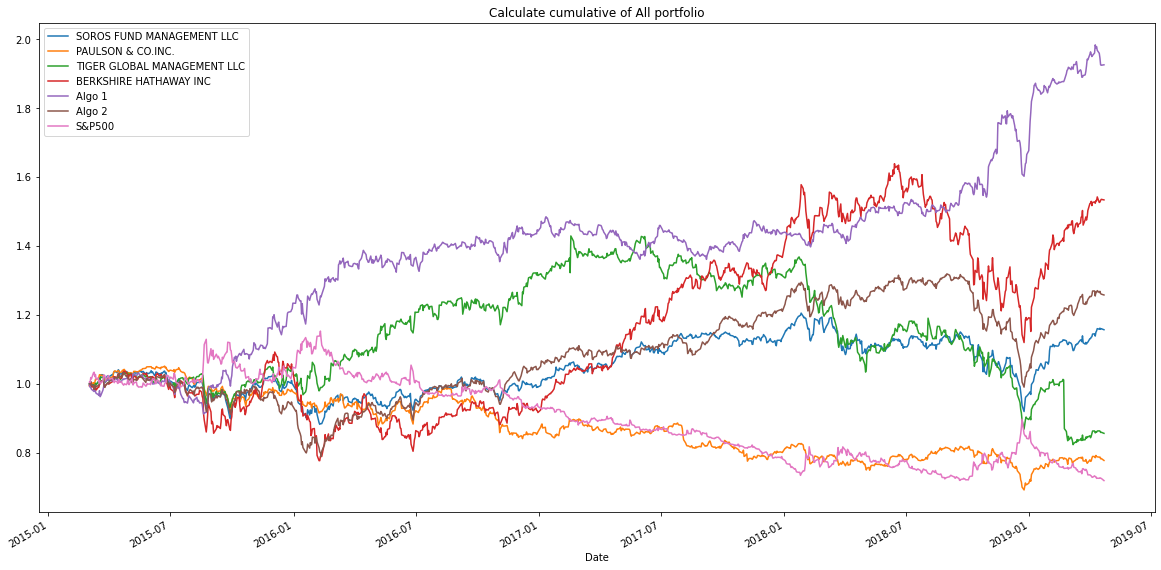

In [357]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title='Calculate cumulative of All portfolio')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk box of All portfolio'}>

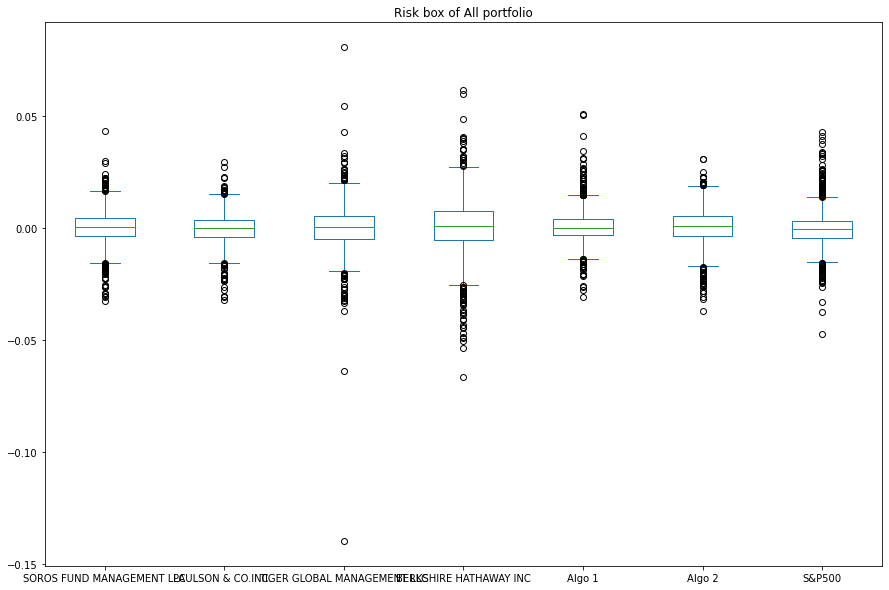

In [358]:
# Box plot to visually show risk
all_returns.plot(kind='box', figsize=(15,10), title='Risk box of All portfolio')

### Calculate Standard Deviations

In [359]:
# Calculate the daily standard deviations of all portfolios
all_portfolios_returns = all_returns.std()
all_portfolios_returns.head()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [360]:
# Calculate  the daily standard deviation of S&P 500
all_portfolios_returns = all_portfolios_returns.sort_values(ascending=False)
# Determine which portfolios are riskier than the S&P 500
all_portfolios_returns.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P500                         0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

### Calculate the Annualized Standard Deviation

In [361]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolios_returns * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day std of All portfolio'}, xlabel='Date'>

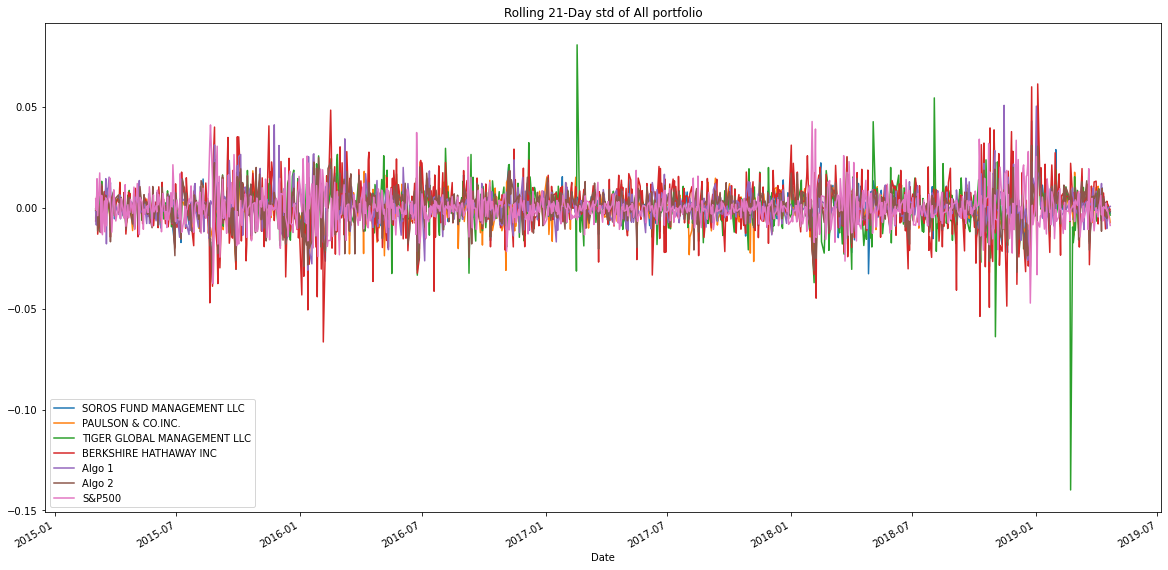

In [362]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns.rolling(window=21).mean()
# Plot the rolling standard deviation
all_returns.plot(kind='line', figsize=(20,10), title='Rolling 21-Day std of All portfolio')

### Calculate and plot the correlation

<AxesSubplot:>

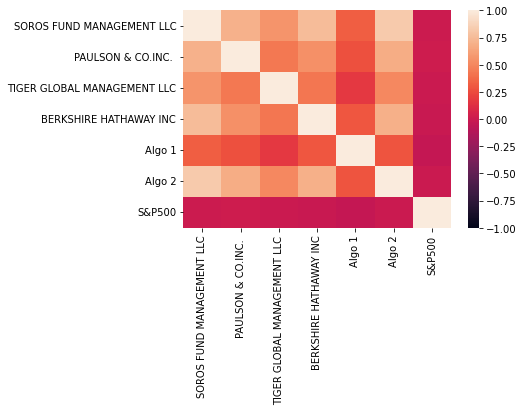

In [363]:
# Calculate the correlation
correlation = all_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo1'}, xlabel='Date'>

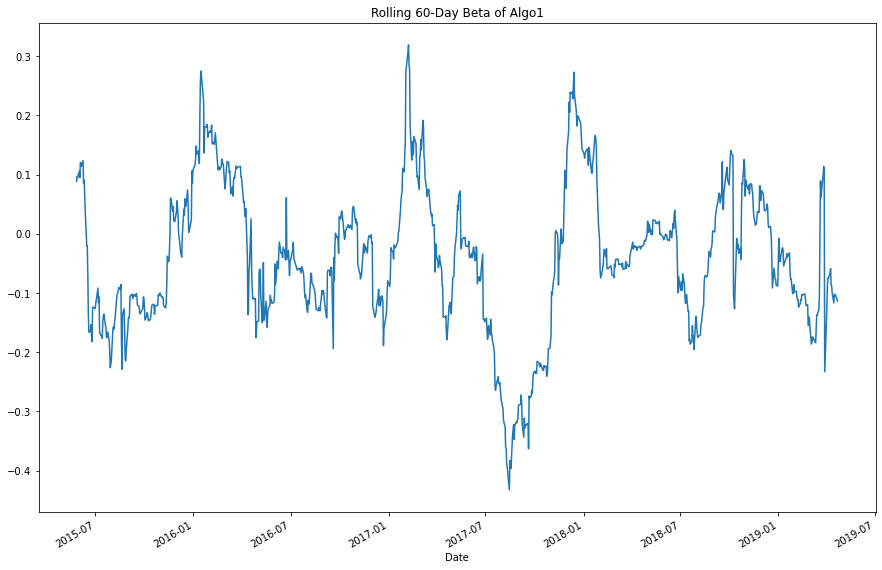

In [364]:
# Calculate covariance of a single portfolio
algo1_covariance = all_returns['Algo 1'].rolling(window=60).cov(all_returns['S&P500'])
algo1_covariance = all_returns['S&P500'].rolling(window=60).cov(all_returns['Algo 1'])

# Calculate variance of S&P 500
variance = all_returns['S&P500'].rolling(window=60).var()

# Computing beta
algo1_portfolio_beta = algo1_covariance / variance

# Plot beta trend
algo1_portfolio_beta.plot(kind='line', figsize=(15,10), title='Rolling 60-Day Beta of Algo1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling 21-Day EWA of All portfolio'}, xlabel='Date'>

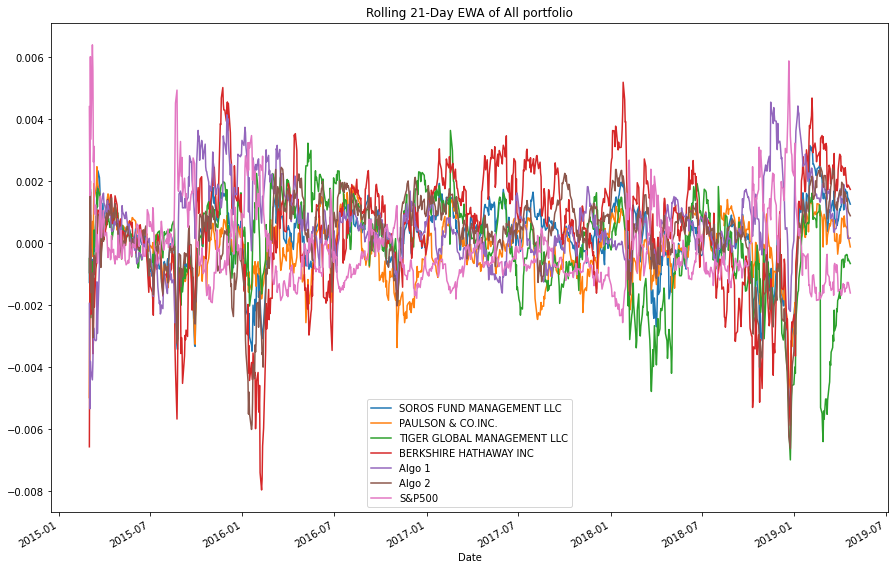

In [365]:
# Use `ewm` to calculate the rolling window
EWA = all_returns.ewm(21).mean()

EWA.plot(kind='line', figsize=(15,10), title='Rolling 21-Day EWA of All portfolio')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [366]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_returns.mean()-all_returns['S&P500'].mean()) * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios of All portfolio'}>

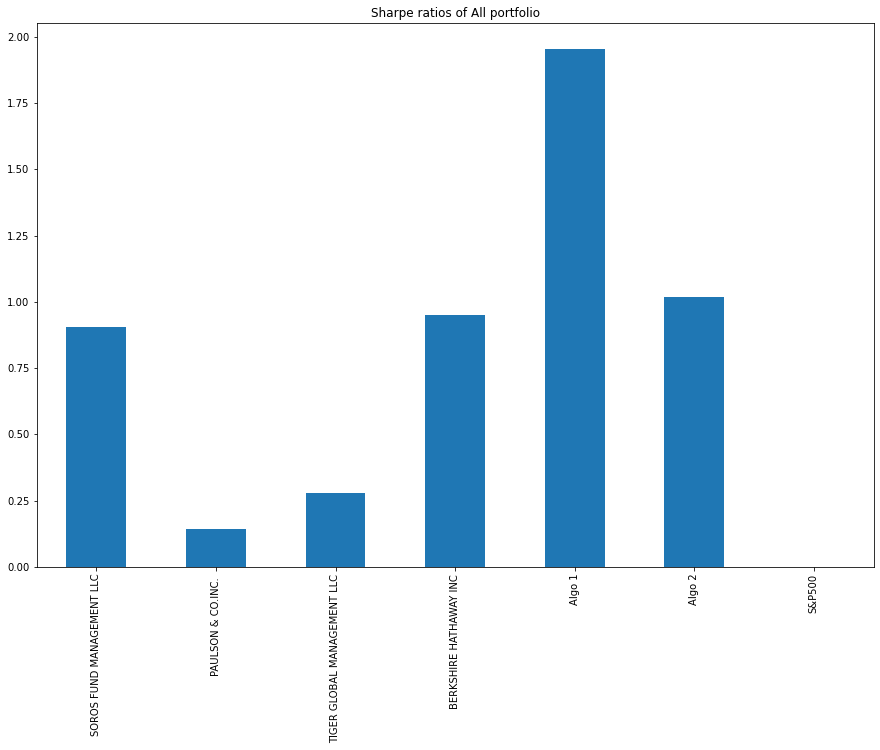

In [367]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(15,10), title='Sharpe ratios of All portfolio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [368]:
# Reading data from 1st stock
goog_returns_path = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_returns_path, parse_dates=True, infer_datetime_format=True)
goog_df.sort_index(inplace=True)

In [369]:
# Reading data from 2nd stock
appl_returns_path = Path("./Resources/aapl_historical.csv")
appl_df = pd.read_csv(appl_returns_path, parse_dates=True, infer_datetime_format=True)
appl_df.sort_index(inplace=True)

In [370]:
# Reading data from 3rd stock
cost_returns_path = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_returns_path, parse_dates=True, infer_datetime_format=True)
cost_df.sort_index(inplace=True)

In [371]:
# Combine all stocks in a single DataFrame
stocks_returns = pd.concat([goog_df, appl_df, cost_df], axis="rows", join="inner")

In [372]:
# Reset Date index
stocks_returns = stocks_returns.reset_index()

In [373]:
# Reorganize portfolio data by having a column per symbol
stocks_returns = stocks_returns.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
stocks_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
1/10/2019,153.80,210.64,1070.33
1/11/2019,152.29,210.51,1057.19
1/14/2019,150.00,209.00,1044.69
1/15/2019,153.07,211.03,1077.15
1/16/2019,154.94,210.18,1080.97


In [374]:
# Calculate daily returns
all_return = stocks_returns.pct_change()
# Drop NAs
all_return = all_return.dropna()
# Display sample data
all_return.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
1/11/2019,-0.009818,-0.000617,-0.012277
1/14/2019,-0.015037,-0.007173,-0.011824
1/15/2019,0.020467,0.009713,0.031071
1/16/2019,0.012217,-0.004028,0.003546
1/17/2019,0.005938,0.006090,0.008261


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [375]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = all_return.dot(weights)

# Display sample data
portfolio_return.head()

Trade DATE
1/11/2019   -0.007571
1/14/2019   -0.011345
1/15/2019    0.020417
1/16/2019    0.003912
1/17/2019    0.006763
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [396]:
# Join your returns DataFrame to the original returns DataFrame
all_return = stocks_returns.pct_change()

In [397]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_return.head()
all_return.dropna()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
1/11/2019,-0.009818,-0.000617,-0.012277
1/14/2019,-0.015037,-0.007173,-0.011824
1/15/2019,0.020467,0.009713,0.031071
1/16/2019,0.012217,-0.004028,0.003546
1/17/2019,0.005938,0.006090,0.008261
...,...,...,...
9/28/2018,0.003512,0.003761,-0.000979
9/4/2018,0.011606,-0.000851,0.002958
9/5/2018,-0.006525,0.003963,-0.008789


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [398]:
# Calculate the annualized `std`
all_portfolios_returns = all_return.std()
annualize_std =  all_portfolios_returns * np.sqrt(252)
annualize_std.head()

Symbol
AAPL    0.816421
COST    0.703888
GOOG    0.537231
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day std of All portfolio'}, xlabel='Trade DATE'>

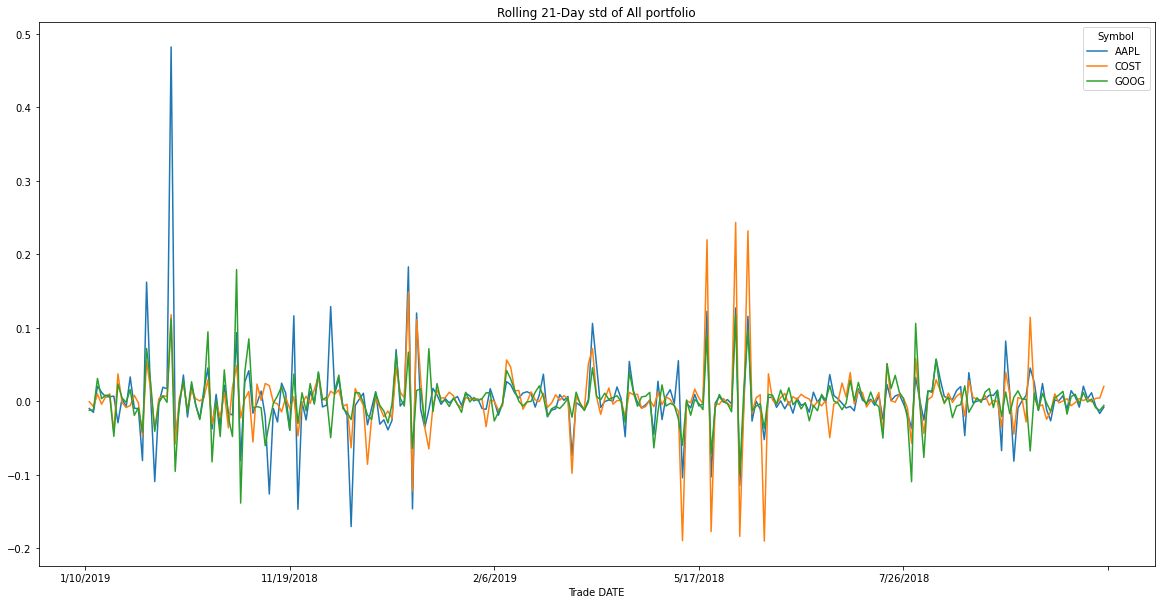

In [399]:
# Calculate rolling standard deviation
all_return.rolling(window=21).mean()
# Plot rolling standard deviation
all_return.plot(kind='line', figsize=(20,10), title='Rolling 21-Day std of All portfolio')

### Calculate and plot the correlation

<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

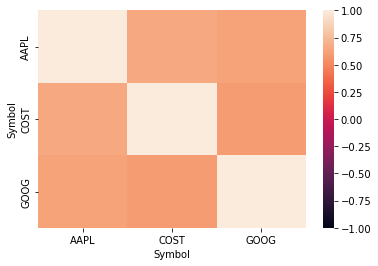

In [400]:
# Calculate and plot the correlation
custom_portpolio_correlation = all_return.corr()
sns.heatmap(custom_portpolio_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of goog'}>

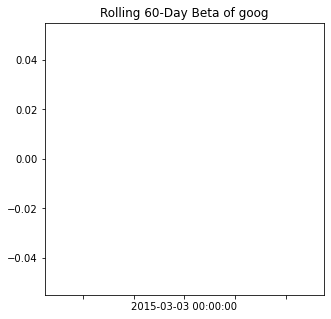

In [406]:
# Calculate and plot Beta
goog_covariance = all_return['COST'].rolling(window=60).cov(all_returns['S&P500'])
goog_covariance = all_returns['S&P500'].rolling(window=60).cov(all_return['COST'])

goog_portfolio_beta = goog_covariance / variance
goog_portfolio_beta.plot(kind='line', figsize=(5,5), title='Rolling 60-Day Beta of goog')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [333]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = ((all_return.mean()-all_returns['S&P500'].mean()) * 252) / (all_return.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe ratio of All stocks'}, xlabel='Symbol'>

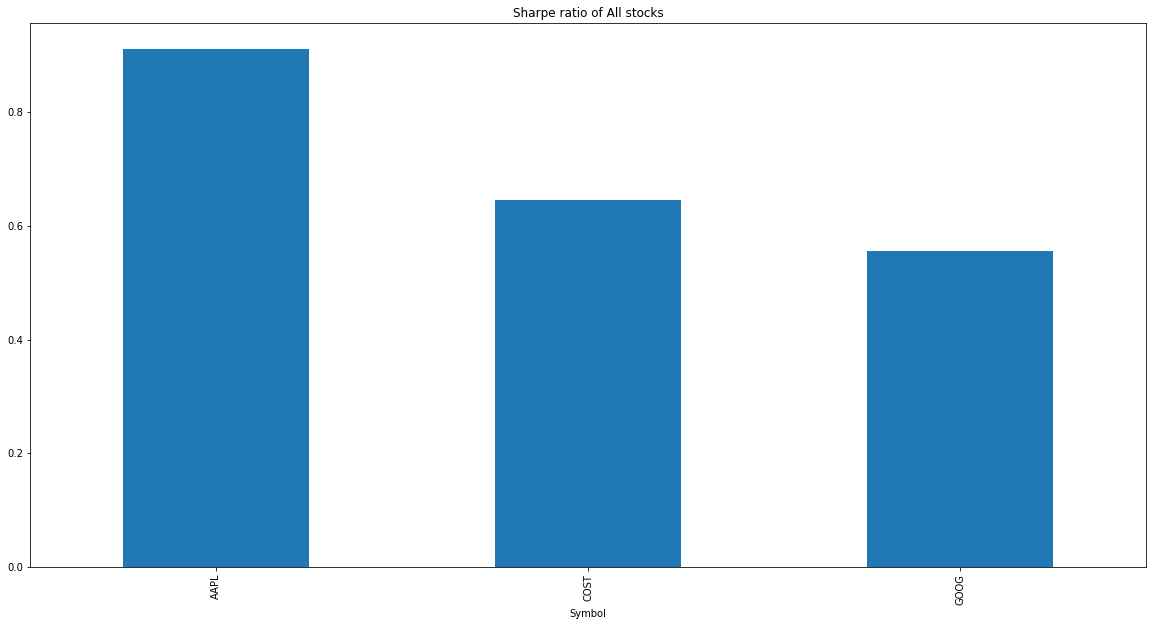

In [334]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = 'bar', figsize=(20,10), title='Sharpe ratio of All stocks')

### How does your portfolio do?

Write your answer here!

Good!